# Berkeley Earth Dataset
## Exploratory Data Analysis

http://berkeleyearth.org/data/

U.S. monthly average temperature data: http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/united-states-TAVG-Trend.txt

Temperatures are in Celsius and reported as anomalies relative to the Jan 1951-Dec 1980 average.  Uncertainties represent the 95% confidence interval.

```
% Estimated Jan 1951-Dec 1980 absolute temperature (C): 8.79 +/- 0.08
% 
% Estimated Jan 1951-Dec 1980 monthly absolute temperature (C):
%      Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec
%      -4.07  -1.75   2.17   8.06  13.90  18.77  21.50  20.50  16.27   9.74   2.79  -2.36
% +/-   0.10   0.09   0.09   0.09   0.09   0.09   0.10   0.09   0.09   0.09   0.09   0.09
```

In [1]:
absolute_temp = 8.79
monthly_absolute_temp = {
    1: -4.07,
    2: -1.75,
    3: 2.17,
    4: 8.06,
    5: 13.90,
    6: 18.77,
    7: 21.50,
    8: 20.50,
    9: 16.27,
    10: 9.74,
    11: 2.79,
    12: -2.36
}

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
column_names = [
    'year',
    'month',
    'monthly_anomaly',
    'monthly_uncertainty',    
    'annual_anomaly',
    'annual_uncertainty',
    '5year_anomaly',
    '5year_uncertainty',    
    '10year_anomaly',
    '10year_uncertainty',
    '20year_anomaly',
    '20year_uncertainty'
]

raw_df = pd.read_csv(
    'http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/united-states-TAVG-Trend.txt',
    sep=r'\s+',
    skiprows=70,
    names=column_names,
    index_col=['year', 'month']
)
raw_df.head()

monthly_anomaly  monthly_uncertainty  annual_anomaly  \
year month                                                         
1768 9               -0.850                2.880             NaN   
     10              -1.578                3.386             NaN   
     11              -1.199                3.783          -0.471   
     12              -0.522                4.979          -0.204   
1769 1                0.118                4.856          -0.088   

            annual_uncertainty  5year_anomaly  5year_uncertainty  \
year month                                                         
1768 9                     NaN            NaN                NaN   
     10                    NaN            NaN                NaN   
     11                  2.380            NaN                NaN   
     12                  2.390            NaN                NaN   
1769 1                   2.325            NaN                NaN   

            10year_anomaly  10year_uncertainty  20year_anomaly  \
year month                                                       
1768 9                 NaN                 NaN             NaN   
     10                NaN                 NaN             NaN   
     11                NaN                 NaN             NaN   
     12                NaN                 NaN             NaN   
1769 1                 NaN                 NaN             NaN   

            20year_uncertainty  
year month                      
1768 9                     NaN  
     10                    NaN  
     11                    NaN  
     12                    NaN  
1769 1                     NaN

In [4]:
anomaly_colnames = [colname for colname in column_names if 'anomaly' in colname]
anomalies = raw_df.loc[:, anomaly_colnames]
anomalies.dropna().tail()

monthly_anomaly  annual_anomaly  5year_anomaly  10year_anomaly  \
year month                                                                   
2003 5                0.543           1.020          0.959           0.951   
     6                0.101           0.962          0.990           0.956   
     7                0.999           0.793          1.019           0.948   
     8                1.333           0.780          1.022           0.942   
     9                0.029           0.924          1.025           0.927   

            20year_anomaly  
year month                  
2003 5               0.750  
     6               0.757  
     7               0.761  
     8               0.764  
     9               0.775

In [5]:
absolute_anomalies = anomalies.copy()
absolute_anomalies.loc[:, :] += absolute_temp
absolute_anomalies.tail()

monthly_anomaly  annual_anomaly  5year_anomaly  10year_anomaly  \
year month                                                                   
2013 5                8.963             NaN            NaN             NaN   
     6               10.218             NaN            NaN             NaN   
     7                9.364             NaN            NaN             NaN   
     8                9.458             NaN            NaN             NaN   
     9               10.793             NaN            NaN             NaN   

            20year_anomaly  
year month                  
2013 5                 NaN  
     6                 NaN  
     7                 NaN  
     8                 NaN  
     9                 NaN

In [6]:
period_idx = pd.period_range(start='1768-09-01', end='2013-09-01', freq='M')

periodic = absolute_anomalies.reset_index().set_index(period_idx)

The following plot matches the Berkeley website: http://berkeleyearth.lbl.gov/regions/united-states

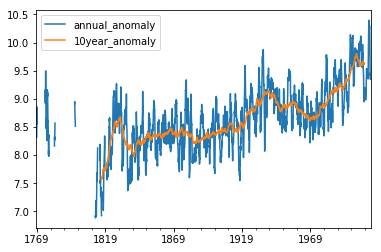

In [7]:
periodic[['annual_anomaly', '10year_anomaly']].plot()